# Assignment 6 - Instructions

Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature  
The mean temperature each day  
The mean temperature for each month  
60% of the marks will be given for the above  

For the last 40%

Plot:

The Windspeed (there is data missing from this column)  
The rolling windspeed (say over 24 hours)  
The max windspeed for each day  
The monthly mean of the daily max windspeeds (yer I am being nasty here)  

*You do not need to over comment your code. Marks will be given for how nice the plots are.*

In [76]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# Read in Data
# Skip first 23 rows to access data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
#df.head(3)


# i) Plot the temperature

#sns.lineplot(data=df, x="date", y="temp")  - The Kernel crashes due to the volume of data when trying to plot the hourly temperature across the period in dataset (1996 - 2025)



/tmp/ipykernel_28967/3945244926.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


/tmp/ipykernel_28967/1916316638.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Text(0.5, 1.0, 'Daily Mean Temperature')

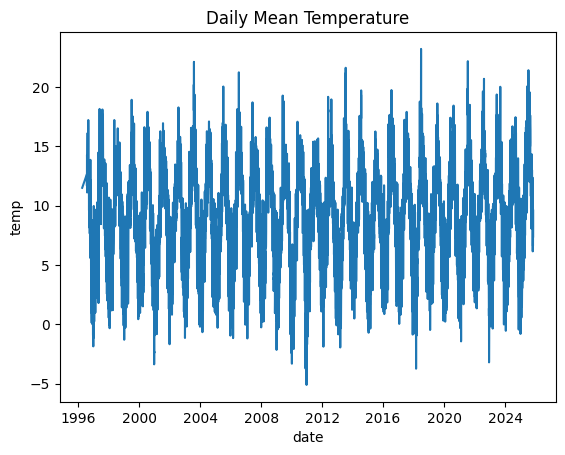

In [ ]:
 # ii) Plot the mean temperature

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index per Lecture notes
# https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/code/Topic06-dates/L2-Timeseries%20in%20pandas.ipynb

df.set_index('date',inplace=True)

# Will get the daily average temperature & plot this
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

df_daily_temp = df.resample("D").mean(numeric_only=True)

# can't use date as x index as used as index & no longer a column
sns.lineplot(data=df_daily_temp, x=df_daily_temp.index, y="temp")

plt.title("Daily Mean Temperature")




In [79]:
df.columns

Index(['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt'],
      dtype='object')

Text(0.5, 1.0, 'Monthly Mean Temperature')

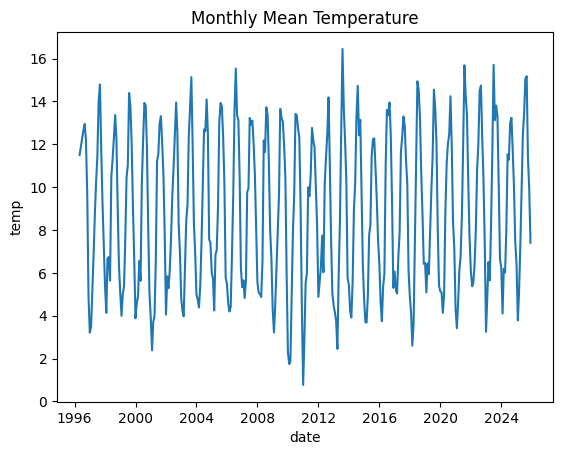

In [ ]:
# iii) The mean temperature for each month

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

df_monthly_temp = df.resample("ME").mean(numeric_only=True) 

# can't use date as x index as used as index & no longer a column
sns.lineplot(data=df_monthly_temp, x=df_monthly_temp.index, y="temp")

plt.title("Monthly Mean Temperature")